In [213]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn import datasets

In [214]:
np.random.seed(0)


1 Generate and plot a test dataset

In [215]:
# Generating a dataset using scikit learn
X, y = datasets.make_classification(n_features=2, n_redundant=0, n_informative=2, n_samples=100, n_clusters_per_class=1)
# Output of the features in is standard axes mean and variance = 0. Scaling the data to have the desired variance and mean.
X[:,0] = np.abs(X[:,0] * 0.5 + 5)
X[:,1] = np.abs(X[:,1] * 30 + 160)

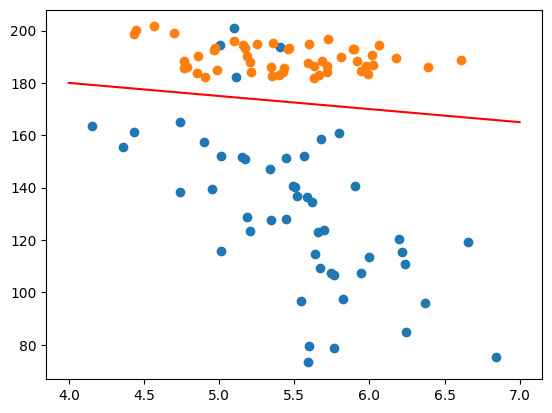

In [216]:
# Plotting the dataset, with each class in a different color
fig, ax = plt.subplots()
ax.scatter(X[y==0, 0], X[y==0, 1])
ax.scatter(X[y==1, 0], X[y==1, 1])
#Estimating pqrameters of the linear separation line
x1 = np.linspace(4,7,100)
x2 = x1*-5 + 200
ax.plot(x1, x2, color='red')
plt.show()

2 Make a function to generate a suitable covariance matrix

In [217]:
#function ge_cov generates a covariance matrix with the desired standard deviations and rotation angle
def get_cov(sdx=0.1, sdy=2, rotangdeg=45):
    covar = np.array([[sdx**2, 0], [0, sdy**2]])
    rot_ang = rotangdeg / 360 * 2 * np.pi
    rot_mat = [[np.cos(rot_ang),-np.sin(rot_ang)],[np.sin(rot_ang),np.cos(rot_ang)]]
    
    covar = np.matmul(np.matmul(rot_mat, covar), np.transpose(rot_mat))
    return covar

covar = get_cov()

In [218]:
#Generating a meshgrid to plot the probability distribution
x1line = np.linspace(-1,1,200)
x2line = np.linspace(-1,1,200)

x1grid, x2grid = np.meshgrid(x1line, x2line)
Xgrid = np.transpose(np.array([x1grid, x2grid]).reshape(2,40000))

In [219]:
#Putting the above in a function for future use
def gen_sample_grid(npx=200, npy=200, limit=1):
    x1line = np.linspace(-limit, limit, npx)
    x2line = np.linspace(-limit, limit, npy)
    x1grid, x2grid = np.meshgrid(x1line, x2line)
    Xgrid = np.array([x1grid, x2grid]).reshape([2,npx*npy]).T
    return Xgrid,x1line,x2line

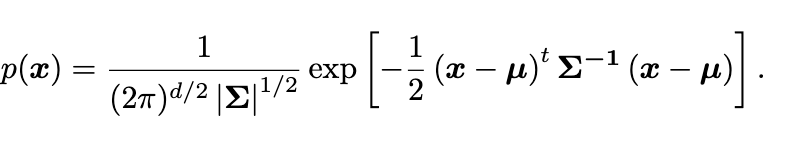

In [220]:
#Calculating the probability distribution on the meshgrid
p = 1 / (2 * np.pi * np.sqrt(np.linalg.det(covar))) * np.exp(
-1 / 2 * (np.matmul(Xgrid, np.linalg.inv(covar)) * Xgrid).sum(-1))

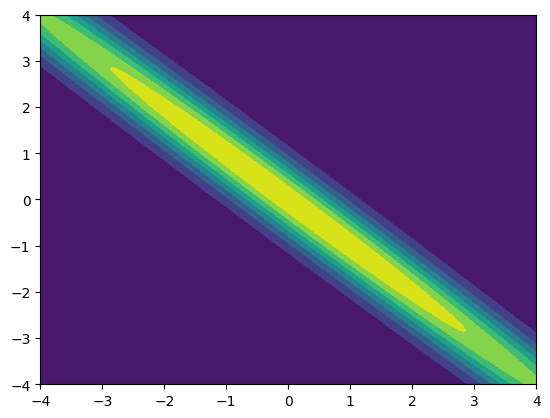

In [234]:
# Reshaping the probability distribution to match the grid shape and plotting the contour
p_reshaped = np.reshape(p, [200, 200])
plt.contourf(4*x1line, 4*x2line, p_reshaped, cmap='viridis')



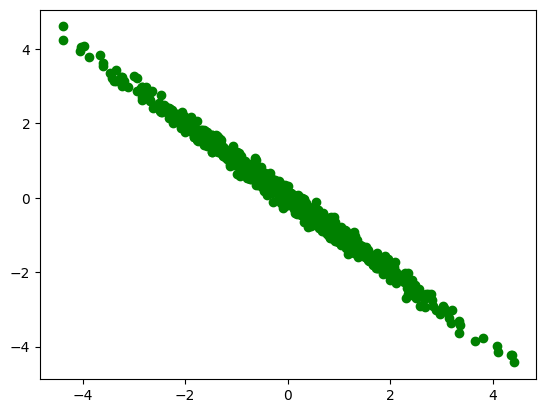

In [235]:
# Generating random samples from a multivariate normal distribution and plotting them
q = np.random.multivariate_normal([0,0], covar, 1000)
plt.scatter(q[:,0], q[:,1], color='green')


3 Generate a circular distribution

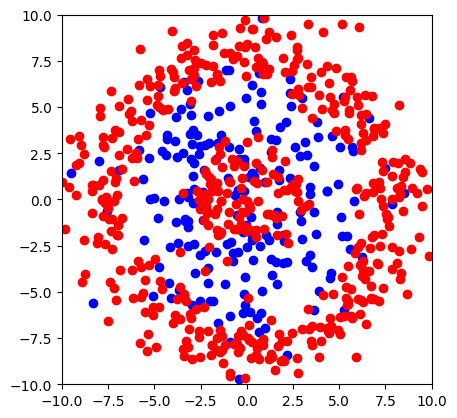

In [236]:
#Generating dataset for class II
r = np.random.normal(5, 2, 200) #Generating 200 normally distrbuted radii
theta = np.random.uniform(0, 2*np.pi, 200)  #Generating 200 unifrom angular values

x_class1, y_class1 = r * np.cos(theta), r * np.sin(theta) #Converting to cartesian coordinates
plt.scatter(x_class1, y_class1, color='blue')
plt.xlim(-10, 10)
plt.ylim(-10, 10)

#Generating dataset for class I
r = np.concatenate((np.random.normal(2, 1, 100), np.random.normal(8, 1, 400))) #Generating 200 normally distrbuted radii
theta = np.concatenate((np.random.uniform(0, 2*np.pi, 100), np.random.uniform(0, 2*np.pi, 400)))  #Generating 200 unifrom angular values
x_class2, y_class2 = r * np.cos(theta), r * np.sin(theta) #Converting to cartesian coordinates
plt.scatter(x_class2, y_class2, color='red')
plt.xlim(-10, 10)
plt.ylim(-10, 10)
plt.gca().set_aspect('equal', adjustable='box')
plt.show()


What do you think the challenges are in separating these?
There is significant overlap between the inner points in Class I and Class II. Furthermore the decision boundary is no longer a linear function but rather the equation of a circle which would be more costly to train.
The standard deviation of class II could be reduced to malke it easier to sepearate the classes

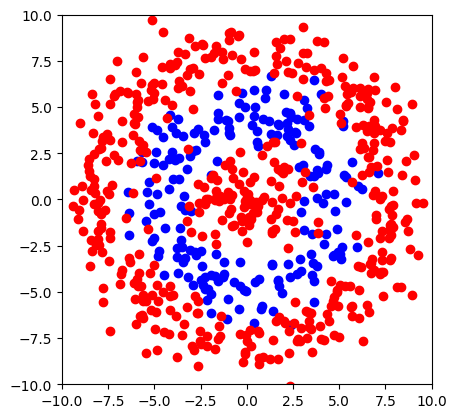

In [237]:
#Generating dataset for class II
r = np.random.normal(5, 1, 200) #Generating 200 normally distrbuted radii - with a smaller variance
theta = np.random.uniform(0, 2*np.pi, 200)  #Generating 200 unifrom angular values

x_class1, y_class1 = r * np.cos(theta), r * np.sin(theta) #Converting to cartesian coordinates
plt.scatter(x_class1, y_class1, color='blue')
plt.xlim(-10, 10)
plt.ylim(-10, 10)

#Generating dataset for class I
r = np.concatenate((np.random.normal(2, 1, 100), np.random.normal(8, 1, 400))) #Generating 200 normally distrbuted radii
theta = np.concatenate((np.random.uniform(0, 2*np.pi, 100), np.random.uniform(0, 2*np.pi, 400)))  #Generating 200 unifrom angular values
x_class2, y_class2 = r * np.cos(theta), r * np.sin(theta) #Converting to cartesian coordinates
plt.scatter(x_class2, y_class2, color='red')
plt.xlim(-10, 10)
plt.ylim(-10, 10)
plt.gca().set_aspect('equal', adjustable='box')
plt.show()


Extra Different Distributions 

In [238]:


#Defining a function generates a ring like distribution, distrubition was calculated using the formula for a normal distribution and the Jacobean for the transformation of transformation of variables r and theta to x and y  
def ring(limit, num_points, mu, sigma):
    x1line = np.linspace(-limit, limit, num_points)
    x2line = np.linspace(-limit, limit, num_points)
    x1grid, x2grid = np.meshgrid(x1line, x2line)
    z = (1 / np.sqrt(2 * np.pi * sigma**2)) * np.exp(-((np.sqrt(x1grid**2 + x2grid**2) - mu)**2) / (2 * sigma**2))
    return x1grid, x2grid, z





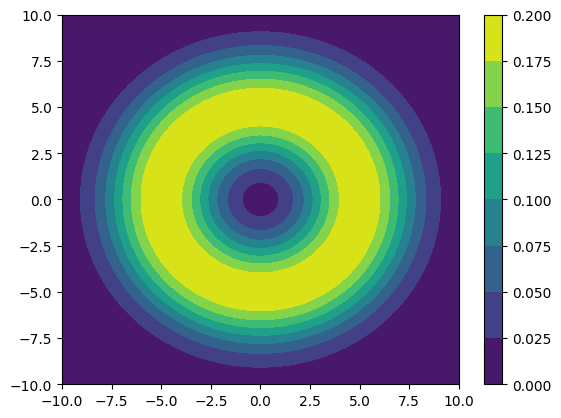

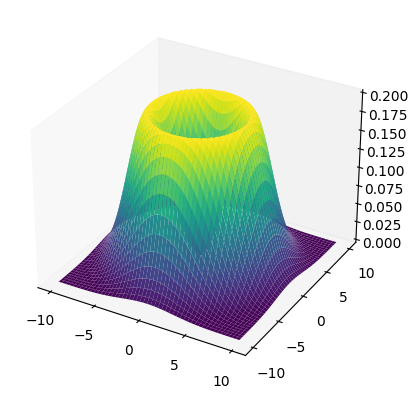

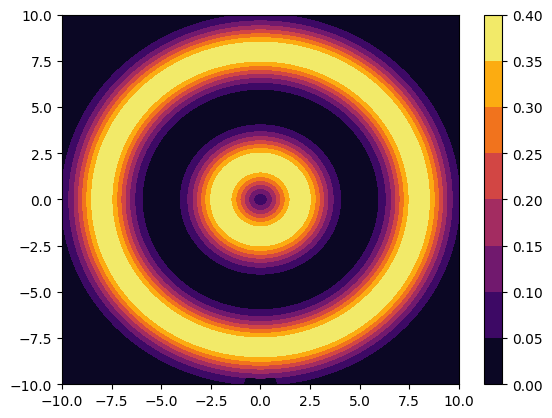

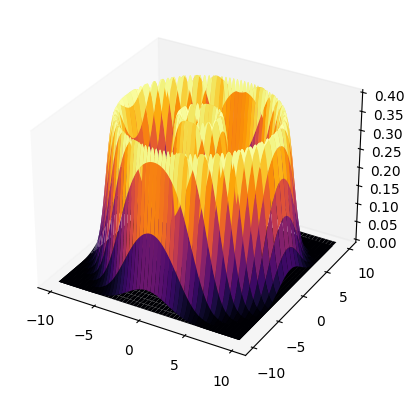

In [244]:
#Contour plot of class II
x1grid, x2grid, z1 = ring(10, 1000, 5, 2)
plt.contourf(x1grid, x2grid, z1, cmap='viridis', alpha=1)
plt.colorbar()
plt.show()

#Surface plot of class II
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.plot_surface(x1grid, x2grid, z1, cmap='viridis')
ax.grid(False)
plt.show()

#Combining two rings for class I
x3grid, x4grid, z2 = ring(10, 1000, 2, 1)
x5grid, x6grid, z3 = ring(10, 1000, 8, 1)

#Contour plot of class I
x1_grid2, x2_grid2 , z_2 = np.concatenate((x3grid, x5grid)), np.concatenate((x4grid, x6grid)), np.concatenate((z2, z3))
plt.contourf(x1_grid2, x2_grid2, z_2, cmap='inferno', alpha=1)
plt.colorbar()

#Surface plot of class I
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.plot_surface(x1_grid2, x2_grid2, z_2, cmap='inferno')
ax.grid(False)
plt.show()
